In [0]:
!pip3 install box2d-py==2.3.8

In [0]:
import gym
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import base64
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
from keras.models import load_model, Model
import keras.backend as K
from collections import deque
from IPython import display as ipythondisplay

In [0]:
class A(object):
  def __init__(self,Alpha, Gamma, n_actions, 
               layer1_size,layer2_size, input_dims):
    self.gamma = Gamma
    self.learning_rate = Alpha
    self.G = 0
    self.input_dims = input_dims
    self.layer1_size = layer1_size
    self.layer2_size = layer2_size
    self.n_actions= n_actions
    self.state_memory = []
    self.action_memory = []
    self.reward_memory = []
    self.policy, self.predict = self.building_policy()
    self.action_space= [i for i in range (n_actions)]

  def building_policy(self): 
    frames_input = Input(shape =(self.input_dims,))
    advantages = Input(shape=[1])
    hidden1 =Dense(self.layer1_size,activation = 'relu')(frames_input)#buildingnueralnetwork
    hidden2 =Dense(self.layer2_size,activation = 'relu')(hidden1)
    output_F = Dense(self.n_actions,activation='softmax')(hidden2)

    def loss(y_true,y_pred): #-log-likelihood
      out = K.clip(y_pred,1e-8,1-1e-8)
      log_lik = y_true*K.log(out)
      return K.sum(-log_lik*advantages)
    
    policy = Model(input=[frames_input,advantages], output =[output_F])#
    policy.compile(optimizer=Adam(lr=self.learning_rate),loss=loss)
    predict = Model(input=[frames_input],output=[output_F])
    return policy, predict

  def choose_action(self, observation):#actionspace
    state = observation[np.newaxis, :]
    probabilities = self.predict.predict(state)[0]
    action = np.random.choice(self.action_space, p= probabilities)
    return action

  def store_transition(self,observation,action,reward):
    self.action_memory.append(action)
    self.state_memory.append(observation)
    self.reward_memory.append(reward)
  
  def learn(self):#agent_learning_alg
    state_memory = np.array(self.state_memory)
    action_memory = np.array(self.action_memory)
    reward_memory = np.array(self.reward_memory)

    actions = np.zeros([len(action_memory),self.n_actions])
    actions[np.arange(len(action_memory)),action_memory] = 1

    G = np.zeros_like(reward_memory)
    for i in range(len(reward_memory)):
      G_sum = 0
      discount = 1
      for j in range (i, len(reward_memory)):
        G_sum += reward_memory[j]*discount
        discount *= self.gamma
      G[i] = G_sum
    mean = np.mean(G)
    std = np.std(G) if np.std(G) > 0 else 1
    self.G = (G-mean)/std

    cost = self.policy.train_on_batch([state_memory,self.G],actions)
    
    self.state_memory = []
    self.action_memory = []
    self.reward_memory = []

In [0]:
 def main():
  env = gym.make('LunarLander-v2')
  trials  = 3000
  total_rewards = []
  episode= 0
  agent = A(Alpha=0.0005, Gamma = 0.99,input_dims= 8, n_actions = 4, 
               layer1_size = 128,layer2_size = 64)#setting_hyperparameters

  for trail in range(trials):
    observation = env.reset()
    total_reward = 0
    done= False
    step = 0
    while not done:
      action = agent.choose_action(observation)
      observation_,reward,done,_ = env.step(action)
      agent.store_transition(observation,action,reward)
      observation = observation_
      total_reward +=reward
    total_rewards.append(total_reward)
    agent.learn() 
    print('Trial number',trail)
    print('Trial Reward',total_reward)
  return total_rewards

In [0]:
if __name__ == "__main__":
  total_rewards = main()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Streaming output truncated to the last 5000 lines.
Trial Reward -60.974436486427024
Trial number 501
Trial Reward -328.3324776841109
Trial number 502
Trial Reward -161.02937926664117
Trial number 503
Trial Reward -89.48659082776392
Trial number 504
Trial Reward -105.24166206409397
Trial number 505
Trial Reward -261.7898402582565
Trial number 506
Trial Reward -41.325226873650266
Trial number 507
Trial Reward -60.2331361488596
Trial number 508
Trial Reward -97.37159707742444
Trial number 509
Trial Reward -47.42596390693534
Trial number 510
Trial Reward -46.33329530139308
Trial number 511
Trial Reward -78.30085144324016
Trial number 512
Trial Reward -55.75981550710874
Trial number 513
Trial Reward -84.88228450493992
Trial number 514
Trial Reward -108.42352947740312
Trial number 515
Trial Reward -146.433863955294
Trial number 516
Trial Reward -119.30357320649696
Trial number 517
Trial Reward -2.0989029984574046
Trial number 518
Trial Reward -71.02343986446559
Trial number 519
Trial Reward 

[-495.9082205376389, -180.63569889041207, -326.4314508641035, -409.76157572960074, -103.5197531262031, -144.71826239471056, -373.78271863320117, -106.35330271729444, -157.71325069558844, -288.3682680845665, -98.02437555565014, -198.33949540534786, -289.53128848757433, -83.18549728061664, -340.9040249630865, -314.76968381653893, -97.43299198650986, -107.22401993725137, -100.18606182428216, -129.8451186105618, -269.7573327200721, -59.25303216389261, -69.19019282023916, -325.65299757489424, -103.80560113422179, -183.2237595724049, -182.78129013136373, -121.28559462196806, -363.1745601220101, -482.13285599014057, -195.40971955912886, -150.7247718833666, -67.89878364836028, -326.03737244502366, -144.10930121654226, -221.66955993260422, -298.428870248251, -334.9378751428987, -358.22894605596997, -97.72789960688304, -222.47863780332455, -72.66126186087983, -251.77541547771884, -178.9057845351395, -188.85193135032029, -379.65482607969625, -79.27728097206999, -104.2699639762708, -266.9453805081

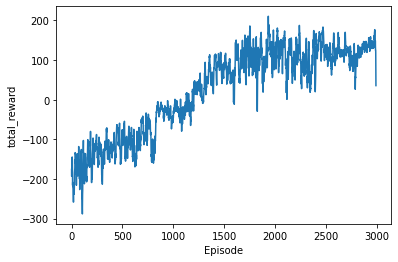

In [0]:
window = 10
plt.xlabel('Episode')
plt.ylabel('total_reward')
plt.plot([np.mean(total_rewards[tr:tr+window]) for tr in range(window, len(total_rewards))])
print(total_rewards)